# Bagging
Also known as bootstrap aggregation, is a general-purpose for reducing the variance of a statistical learning method.
### Method
* Create many (e.g. 100) random sub-samples of our dataset with replacement.
* Train a CART model on each sample.
* Given a new dataset, calculate the average prediction from each model.

### Out of bag error estimation
* Each bagged tree makes use of 2/3 observations. The remaining 1/3 observations not used to fit a given bagged tree are OOB observations.
$$\lim_{n \to \infty}(1-\frac{1}{n})^n=e^{-1}=0.368$$

### Drawbacks with CART and Bagging
* A problem with decision trees like CART is that they are greedy. They choose variable to split based on greedy algorithm that minimizes error.
* Bagging: the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions.

### Example

In [104]:
n = 1000
x1 = np.random.uniform(-1,1,n)
x2 = np.random.uniform(-1,1,n)
prob=(x1 + x2 > -0.5) & (x1 + x2 < 0.5)
prob = [0.8 if (x1 + x2 > -0.5) & (x1 + x2 < 0.5) else 0.2 for x1,x2 in zip(x1,x2)]
y = np.random.binomial(1,p=prob,size=n)

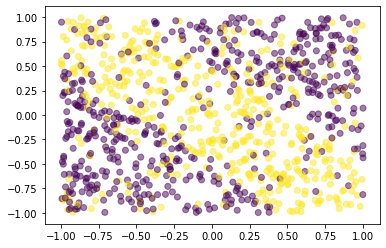

In [106]:
plt.scatter(x1, x2, c=y, alpha=0.5)

In [108]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [146]:
# initialize the base classifier 
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 200

model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = 42) 
X=np.column_stack((x1,x2))

model.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [147]:
x1_new = np.random.uniform(-1,1,n)
x2_new = np.random.uniform(-1,1,n)
X_new=np.column_stack((x1_new,x2_new))
prob = [0.8 if (x1_new + x2_new > -0.5) & (x1_new + x2_new < 0.5) else 0.2 for x1_new,x2_new in zip(x1_new,x2_new)]
y = np.random.binomial(1,p=prob,size=n)

y_pred=model.predict(X_new)

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[310, 240],
       [255, 195]])

# Random Forest

### Idea
* The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction is more accurate than that of any individual tree.
* At each split, only consider a subset of features. And this number of features is the parameter to the algorithms.

### Example
Use a realistic example, weather data for Seattle, WA from 2016 using the NOAA Climate Data Online tool from https://drive.google.com/file/d/1pko9oRmCllAxipZoa3aoztGZfPAD2iwj/view

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('temps.csv')
dat.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Use datetime for dealing with dates. (Codes are copied from https://stackoverflow.com/questions/466345/converting-string-into-datetime)

In [6]:
import datetime

years = dat['year']
months = dat['month']
days = dat['day']

# convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

Text(0.5, 1.0, 'Friend Estimate')

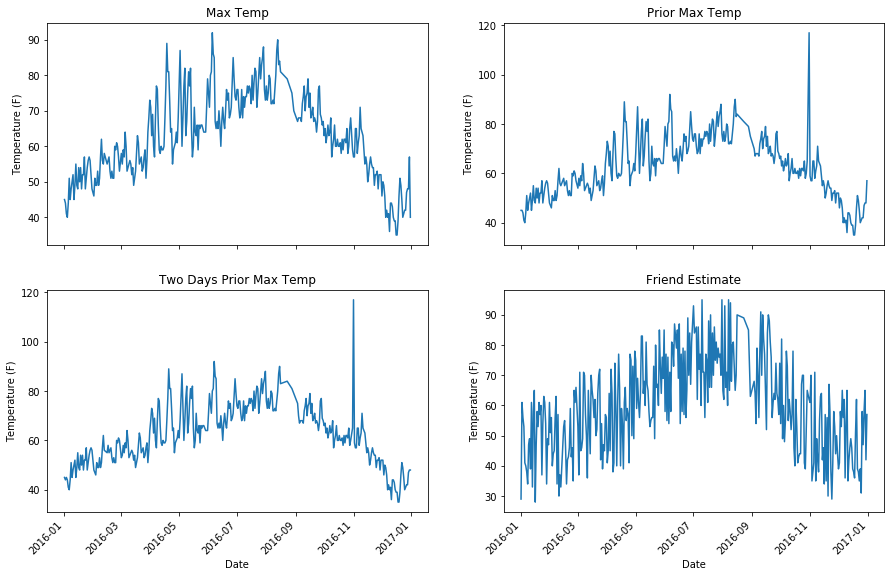

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, dat['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, dat['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, dat['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, dat['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')
#plt.tight_layout(pad=2)

In [14]:
dat = pd.get_dummies(dat)

In [53]:
y = np.array(dat['actual'])
X = dat.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
X = np.array(X)

In [54]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, 
                                                                            test_size = 0.25, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [56]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print(sum(errors)/len(errors))

# Performance metrics
errors = abs(predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

3.873195402298852
Average absolute error: 3.8732 degrees.
Accuracy: 93.93 %.


### Variable Importances
We can calculate how much the error function drops for a variable at each split point. These drops in error can be averaged across all decision trees and output to provide an estimate of the importance of each input variable. The greater the drop when the variable was chosen, the greater the importance.

In [57]:
# Get numerical feature importances
rf.feature_importances_

array([0.        , 0.01032971, 0.02111933, 0.02099328, 0.65555327,
       0.15032983, 0.04538229, 0.03485937, 0.02319048, 0.02068467,
       0.00352492, 0.00258813, 0.0036125 , 0.00228907, 0.00126645,
       0.00230266, 0.00197403])

In [65]:
df=pd.DataFrame(rf.feature_importances_,feature_list)
df.sort_values(0,ascending=False)

,0
temp_1,0.655553
average,0.150330
forecast_noaa,0.045382
forecast_acc,0.034859
forecast_under,0.023190
day,0.021119
temp_2,0.020993
friend,0.020685
month,0.010330
week_Sat,0.003613


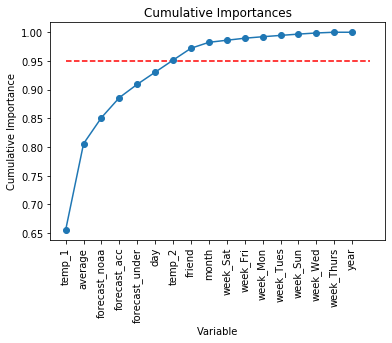

In [77]:
sorted_importances = np.array(df.sort_values(0,ascending=False)[0])
sorted_features = np.array(df.sort_values(0,ascending=False).index)

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

plt.plot(sorted_features, cumulative_importances, 'o-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

plt.xticks(rotation=90)

plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances');